Package loading

In [324]:
using Plots
using Combinatorics
using LinearAlgebra
using Cuba
using Symbolics
include("definitions.jl")

Ampl_vertex_III (generic function with 1 method)

Tasks:
-check Regge action
-implement the remaining definitions concerning the dressed vertex amplitudes
-numerically integrate

Plots of the Hessians

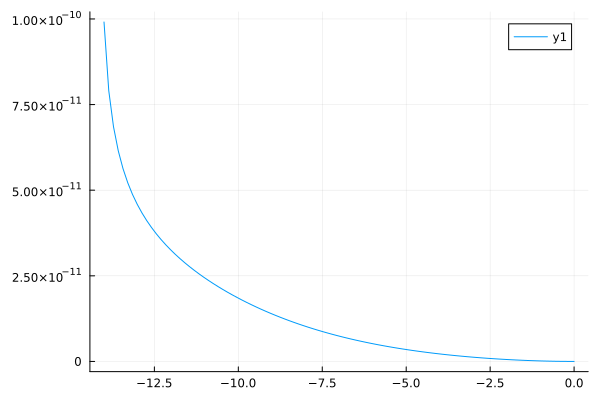

In [22]:
bs = range(-14.0,0, length=100)
plot(bs, [real(1/sqrt(DetSLId.(10.0, 30.0, -b))) for b in bs])


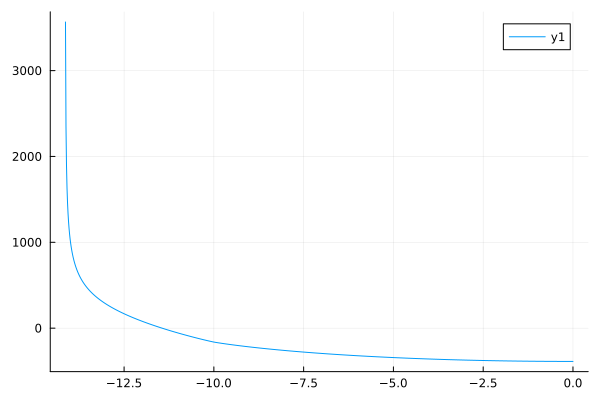

In [165]:
bs = range(-sqrt((10-30)^2/2)+0.01, 0.0, 1000)
plot(bs, S_Regge_IandII.(10.0, 30.0, -bs) + S_phi_SL.(10.0, 30.0, -bs, 2.0, 5.0, 0.1))

In [219]:
bsIandII = range(-sqrt((10-30)^2/2)+0.1, 0.0, 1000)
bsI = range(-sqrt((10-30)^2/2), -sqrt((10-30)^2/4), 100)
bsII = range(-sqrt((10-30)^2/4), 0.0, 1000)
bsIII = range(0.5, 30.0, 1000)
#scatter(bsII, real(Ampl_vertex_II.(10.0, 30.0, -bsII)))
#scatter(bsIII, real(Ampl_vertex_III.(10.0, 30.0, bsIII)))
#scatter(bsIandII, real(Ampl_vertex_IandII.(10.0, 30.0, -bsIandII)))

0.5:0.02952952952952953:30.0

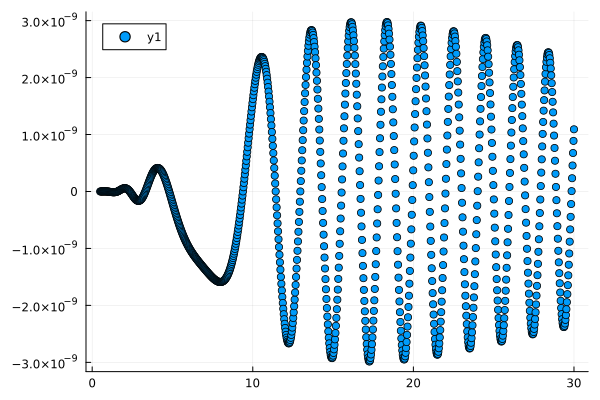

In [227]:
scatter(bsIII, [real(Ampl_vertex_III.(10.0, 30.0, b) * exp(im*S_phi_TL(10.0, 30.0, b, 3.0, 5.0, 0.03))) for b in bsIII])

In [319]:
function Z_I_vegas(a0::Float64, a1::Float64)

    b0 = sqrt((a0 - a1)^2/4)
    b1 = sqrt((a0 - a1)^2/2)

    res_R = vegas( (x,f) -> f[1] = real(Ampl_vertex_I(a0, a1, (b1 - b0) * x[1] + b0)), 1, 1, minevals=1e3, maxevals=1e4)
    
    res_I = vegas( (x,f) -> f[1] = imag(Ampl_vertex_I(a0, a1, (b1 - b0) * x[1] + b0)), 1, 1, minevals=1e3, maxevals=1e4)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Z_I_suave(a0::Float64, a1::Float64)

    b0 = sqrt((a0 - a1)^2/4)
    b1 = sqrt((a0 - a1)^2/2)

    res_R = suave( (x,f) -> f[1] = real(Ampl_vertex_I(a0, a1, (b1 - b0) * x[1] + b0)), 1, 1, minevals=5e4, maxevals=1e5)
    
    res_I = suave( (x,f) -> f[1] = imag(Ampl_vertex_I(a0, a1, (b1 - b0) * x[1] + b0)), 1, 1, minevals=5e4, maxevals=1e5)

    [res_R, res_I] #factor of 1/(b1 - b0) needs to be added!

end

function Z_II_vegas(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)

    res_R = vegas( (x,f) -> f[1] = real(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = vegas( (x,f) -> f[1] = imag(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    [res_R, res_I] #the factor of b0 needs to be added!

end

function Z_II_suave(a0::Float64, a1::Float64, ϕ0::Float64, ϕ1::Float64, m::Float64)

    b0 = sqrt((a0 - a1)^2/4)

    res_R = suave( (x,f) -> f[1] = real(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)
    
    res_I = suave( (x,f) -> f[1] = imag(Ampl_vertex_II(a0, a1, b0 * x[1]) * exp(im * S_phi_SL(a0, a1, b0 * x[1], ϕ0, ϕ1, m))), 1, 1, minevals=1e6, maxevals=1e7)

    [res_R, res_I] #the factor of b0 needs to be added!


end


Z_II_suave (generic function with 2 methods)

In [ ]:
function Det_SL_ϑ_simpl_10_30(b::Float64)

    res = 10^(-13.5) * (sqrt(complex((a0 - a1)^2/2 - b^2)))^(-9) * (sqrt(complex((a0 - a1)^2/4 - b^2)))^(15.25)
    
end

In [320]:
Z_II_vegas(10.0, 30.0, 2.0, 5.0, 0.05)

2-element Vector{Cuba.Integral}:
 Component:
 1: 5.340041630475532e-13 ± 7.22091094741461e-14 (prob.: 0.0)
Integrand evaluations: 1007500
Number of subregions:  0
Note: The desired accuracy was reached
 Component:
 1: -5.835719774706453e-13 ± 7.189986590301596e-14 (prob.: 0.0)
Integrand evaluations: 1007500
Number of subregions:  0
Note: The desired accuracy was reached

In [322]:
Z_II_suave(10.0, 30.0, 2.0, 4.0, 0.05)

2-element Vector{Cuba.Integral}:
 Component:
 1: 3.899785512373634e-13 ± 1.86365877614687e-15 (prob.: 0.0)
Integrand evaluations: 1000000
Number of subregions:  1000
Note: The desired accuracy was reached
 Component:
 1: -9.374924543950772e-13 ± 1.7059433161802279e-15 (prob.: 0.0)
Integrand evaluations: 1000000
Number of subregions:  1000
Note: The desired accuracy was reached

In [323]:
x = Z_II_vegas(10.0, 30.0, 2.0, 4.0, 0.05)

2-element Vector{Cuba.Integral}:
 Component:
 1: 3.930392106749471e-13 ± 7.129632739228082e-14 (prob.: 2.1883990772754794e-17)
Integrand evaluations: 1007500
Number of subregions:  0
Note: The desired accuracy was reached
 Component:
 1: -9.428427837622098e-13 ± 7.08911168817931e-14 (prob.: 0.0)
Integrand evaluations: 1007500
Number of subregions:  0
Note: The desired accuracy was reached

In [296]:
b0 = sqrt((10.0 - 30.0)^2/4)
b1 = sqrt((10.0 - 30.0)^2/2)
vegas( (x,f) -> f[1] = real(Ampl_vertex_I(10.0, 30.0, (b1 - b0) * x[1] + b0)), 1, 1, minevals=1e3, maxevals=1e4)

Component:
 1: NaN ± 5.7350790583402104e-18 (prob.: NaN)
Integrand evaluations: 2500
Number of subregions:  0
Note: The desired accuracy was reached

In [299]:
Det_ϑ = [(1/sqrt(Det_SL_ϑ(10.0, 30.0, -b))) for b in bsI]

100-element Vector{ComplexF64}:
  1.0139573252895739e18 - 1.294474834291879e18im
  0.0002938646913386969 + 0.00011344698106460004im
   7.466160240366643e-5 - 0.00020011641683247754im
   9.947147317543191e-5 + 5.590917039448e-5im
   7.758671987689938e-5 - 6.953721267318612e-5im
   3.541983761285205e-5 + 6.968762442431771e-5im
   4.510778824915089e-5 + 1.1467967523648301e-5im
  1.1621008877343472e-5 - 2.817018786081153e-5im
    2.35303094203169e-5 + 2.065112190495142e-5im
    5.85601849986328e-6 - 8.881223258069828e-6im
   8.605116557547995e-6 + 6.350883045024021e-6im
  2.6438524183291542e-6 - 1.253362237311279e-5im
   6.258050916043171e-6 + 8.353427196647899e-7im
                        ⋮
  6.777671789017208e-17 + 6.951055951629331e-17im
 2.3122295709056765e-17 + 2.3762457729884762e-17im
  7.577689888825527e-18 - 7.415775574922896e-18im
  4.882305910930922e-18 - 4.786870144919315e-18im
  7.124728687089656e-19 + 7.241385555356845e-19im
  1.613583460638536e-19 - 1.591793563972711e-19im
  

In [309]:
1/sqrt(complex(Det_SL_ϑ(10.0, 30.0, 11.0)))

2.322721540371345e-13 - 2.0124168299116773e-13im

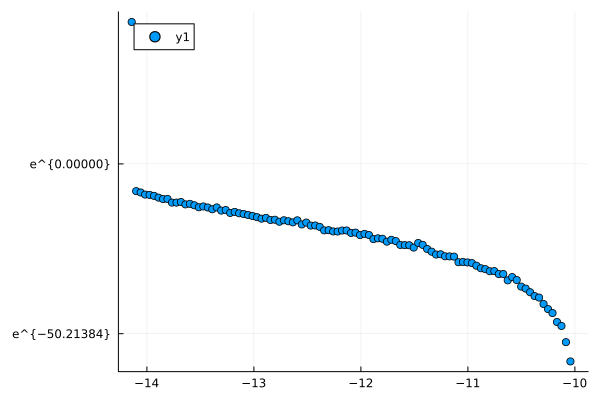

In [311]:
scatter(bsI, real.(Det_ϑ), yscale=:ln)
scatter(bsI, abs.(Det_ϑ), yscale=:ln)

two options to proceed: 

-try symbolic julia

-approximate \vartheta measure for specific configurations: hard for the entire complex-valued function

-IMPORTANT: compute only components 1:15 of the Hessian

In [376]:
function generate_null_sym(v::Array{Num, 1})

    res = [cosh(asinh(-v[1])), cos(atan(v[2],v[3])) + v[1]*sin(atan(v[2],v[3])), -sin(atan(v[2],v[3]))+v[1]*cos(atan(v[2],v[3]))]

    
end

function ϑa_sym(a0::Num, a1::Num, b::Num)

    res = sqrt(((a0 - a1 + sqrt(2(a0 - a1)^2 - 4*b^2))/((a0 - a1 - sqrt(2(a0 - a1)^2 - 4*b^2)))))

end

function ϑb_sym(a0::Num, a1::Num, b::Num)

    res = sqrt(((a0 - a1)^2 - 2*abs(b)*sqrt(2(a0 - a1)^2 - 4*b^2))/((a0 - a1)^2 + 2*abs(b)*sqrt(2(a0 - a1)^2 - 4*b^2)))

end

function n13_refl_sym(a0::Num, a1::Num, b::Num)

    res = [-(2*(a0 - a1)*sqrt(2(a0 - a1)^2 - 4*b^2))/((a0 - a1)^2 - 4*b^2), 0, (-3*(a0 - a1)^2 + 4*b^2)/((a0 - a1)^2 - 4*b^2)]
    
end

function n15_refl_sym(a0::Num, a1::Num, b::Num)

    res = [(2*(a0 - a1)*sqrt(2(a0 - a1)^2 - 4*b^2))/((a0 - a1)^2 - 4*b^2), 0, (3*(a0 - a1)^2 - 4*b^2)/((a0 - a1)^2 - 4*b^2)]
    
end

function n23_refl_sym(a0::Num, a1::Num, b::Num)

    res = [(2*(a0 - a1)*sqrt(2(a0 - a1)^2 - 4*b^2))/((a0 - a1)^2 - 4*b^2), 0, (3*(a0 - a1)^2 - 4*b^2)/((a0 - a1)^2 - 4*b^2)]
    
end

function n25_refl_sym(a0::Num, a1::Num, b::Num)

    res = [-(2*(a0 - a1)*sqrt(2(a0 - a1)^2 - 4*b^2))/((a0 - a1)^2 - 4*b^2), 0, (-3*(a0 - a1)^2 + 4*b^2)/((a0 - a1)^2 - 4*b^2)]
    
end

function n34_refl_sym(a0::Num, a1::Num, b::Num)

    res = [((5*(a0 - a1)^2 - 4*b^2)*sqrt((a0 - a1)^2 -2*b^2))/(sqrt(2)*(-(a0 - a1)^2*b + 4*b^3)), (a0 - a1)/(2*b), (7*(a0 - a1)^3 + 12*(-a0 + a1)*b^2)/(-2*(a0 - a1)^2*b + 8*b^3)]
    
end

function n36_refl_sym(a0::Num, a1::Num, b::Num)

    res = [(sqrt((a0 - a1)^2/2 - b^2))/b, -(a0 - a1)/(2*b), (a0 - a1)/(2*b)]
    
end

function n45_refl_sym(a0::Num, a1::Num, b::Num)

    res = [((5*(a0 - a1)^2 - 4*b^2)*sqrt((a0 - a1)^2 -2*b^2))/(sqrt(2)*(-(a0 - a1)^2*b + 4*b^3)), -(a0 - a1)/(2*b), (7*(a0 - a1)^3 + 12*(-a0 + a1)*b^2)/(-2*(a0 - a1)^2*b + 8*b^3)]

end

function n56_refl_sym(a0::Num, a1::Num, b::Num)

    res = [-(sqrt((a0 - a1)^2/2 - b^2))/b, -(a0 - a1)/(2*b), -(a0 - a1)/(2*b)]
    
end

function edgevectorsets_refl_sym(a0::Num, a1::Num, b::Num)

    res = [ [0, 0, n13_refl_sym(a0, a1, b), n14, n15_refl_sym(a0, a1, b), n16],
            [0, 0, n23_refl_sym(a0, a1, b), n24, n25_refl_sym(a0, a1, b), n26],
            [n13_refl_sym(a0, a1, b), n23, 0, n34_refl_sym(a0, a1, b), 0, n36_refl_sym(a0, a1, b)],
            [n14, n24, n34_refl_sym(a0, a1, b), 0, n45_refl_sym(a0, a1, b), 0],
            [n15_refl_sym(a0, a1, b), n25_refl_sym(a0, a1, b), 0, n45_refl_sym(a0, a1,b), 0, n56_refl_sym(a0, a1, b)],
            [n16, n26, n36_refl_sym(a0, a1, b), 0, n56_refl_sym(a0, a1, b), 0]]
    
end

function nullvectorsets_refl_sym(a0::Num, a1::Num, b::Num)

    res = [ [0, 0, generate_null_sym(n13_refl_sym(a0, a1, b)), generate_null(n14), generate_null_sym(n15_refl_sym(a0, a1, b)), generate_null(n16)],
            [0, 0, generate_null_sym(n23_refl_sym(a0, a1, b)), generate_null(n24), generate_null_sym(n25_refl_sym(a0, a1, b)), generate_null(n26)],
            [generate_null_sym(n13_refl_sym(a0, a1, b)), generate_null(n23), 0, generate_null_sym(n34_refl_sym(a0, a1, b)), 0, generate_null_sym(n36_refl_sym(a0, a1, b))],
            [generate_null(n14), generate_null(n24), generate_null_sym(n34_refl_sym(a0, a1, b)), 0, generate_null_sym(n45_refl_sym(a0, a1, b)), 0],
            [generate_null_sym(n15_refl_sym(a0, a1, b)), generate_null_sym(n25_refl_sym(a0, a1, b)), 0, generate_null_sym(n45_refl_sym(a0, a1,b)), 0, generate_null_sym(n56_refl_sym(a0, a1, b))],
            [generate_null(n16), generate_null(n26), generate_null_sym(n36_refl_sym(a0, a1, b)), 0, generate_null_sym(n56_refl_sym(a0, a1, b)), 0]]
    
end

function lengthsetsSL_sym(a0::Num, a1::Num, b::Num)
    
    res = [[0, 0, a0, a0, a0, a0], [0, 0, a1, a1, a1, a1], [a0, a1, 0, b, 0, b], [a0, a1, b, 0, b, 0], [a0, a1, 0, b, 0, b], [a0, a1, b, 0, b, 0]]

end

function ϑsets_sym(a0::Num, a1::Num, b::Num)

    res = [ [0, 0, ϑa_sym(a0, a1, b)^(-2), ϑa_sym(a0, a1, b)^(-2), ϑa_sym(a0, a1, b)^(-2), ϑa_sym(a0, a1, b)^(-2)],
            [0, 0, ϑa_sym(a0, a1, b)^2, ϑa_sym(a0, a1, b)^2, ϑa_sym(a0, a1, b)^2, ϑa_sym(a0, a1, b)^2],
            [ϑa_sym(a0, a1, b)^(-2), ϑa_sym(a0, a1, b)^2, 0, ϑb_sym(a0, a1, b)^(-2), 0 ,ϑb_sym(a0, a1, b)^(-2)],
            [ϑa_sym(a0, a1, b)^(-2), ϑa_sym(a0, a1, b)^2, ϑb_sym(a0, a1, b)^(-2), 0 ,ϑb_sym(a0, a1, b)^(-2), 0],
            [ϑa_sym(a0, a1, b)^(-2), ϑa_sym(a0, a1, b)^2, 0, ϑb_sym(a0, a1, b)^(-2), 0 ,ϑb_sym(a0, a1, b)^(-2)],
            [ϑa_sym(a0, a1, b)^(-2), ϑa_sym(a0, a1, b)^2, ϑb_sym(a0, a1, b)^(-2), 0 ,ϑb_sym(a0, a1, b)^(-2), 0] ]
            
end

function HessianSLϑ_sym(a0::Num, a1::Num, b0::Num)

    @variables H[1:18, 1:18]

    for a in 1:6
        for i in 1:3
            for j in 1:3

                A_block = 3(a-1) + i
                C_block = 3(a-1) + j

                H[A_block, C_block] =   -im/2 * sum([ lengthsetsSL_sym(a0, a1, b0)[a][c] * (η[i][j] + edgevectorsets_refl_sym(a0, a1, b0)[a][c][i]*edgevectorsets_refl_sym(a0, a1, b0)[a][c][j] - 
                im*ϑsets_sym(a0, a1, b0)[a][c]*nullvectorsets_refl_sym(a0, a1, b0)[a][c][i]*nullvectorsets_refl_sym(a0, a1, b0)[a][c][j]) for c in indexsets[a]])

                for b in indexsets[a]

                    B_block = 3(b-1) + j             
                    
                    H[A_block, B_block] = im/2 * lengthsetsSL_sym(a0, a1, b0)[a][b] * 
                    (η[i][j] + edgevectorsets_refl_sym(a0, a1, b0)[a][b][i]*edgevectorsets_refl_sym(a0, a1, b0)[a][b][j] - 
                    im*ϑsets_sym(a0, a1, b0)[a][b]*
                    nullvectorsets_refl_sym(a0, a1, b0)[a][b][i]*nullvectorsets_refl_sym(a0, a1, b0)[a][b][j] + 
                    ϵsets[a][b]*sum([levicivita([i,j,k])*η[k][l]*edgevectorsets_refl_sym(a0, a1, b0)[a][b][l] for k in 1:3, l in 1:3]))

                end
            end
        end
    end  
    
    H
    
end

HessianSLϑ_sym (generic function with 1 method)

In [367]:
@variables x,y,z
ϑsets_sym(x, y, z)[3]

6-element Vector{Num}:
                         (1 / sqrt((x - y + sqrt(2((x - y)^2) - 4(z^2))) / (x - y - sqrt(2((x - y)^2) - 4(z^2)))))^2
                               sqrt((x - y + sqrt(2((x - y)^2) - 4(z^2))) / (x - y - sqrt(2((x - y)^2) - 4(z^2))))^2
                                                                                                                   0
 (1 / sqrt(((x - y)^2 - 2abs(z)*sqrt(2((x - y)^2) - 4(z^2))) / ((x - y)^2 + 2abs(z)*sqrt(2((x - y)^2) - 4(z^2)))))^2
                                                                                                                   0
 (1 / sqrt(((x - y)^2 - 2abs(z)*sqrt(2((x - y)^2) - 4(z^2))) / ((x - y)^2 + 2abs(z)*sqrt(2((x - y)^2) - 4(z^2)))))^2

In [357]:
ϑb_sym(c,d,c)

sqrt(((c - d)^2 - 2abs(c)*sqrt(-4(c^2) + 2((c - d)^2))) / ((c - d)^2 + 2abs(c)*sqrt(-4(c^2) + 2((c - d)^2))))

In [377]:
HessianSLϑ_sym(x, y, z)

LoadError: CanonicalIndexError: setindex! not defined for Symbolics.Arr{Num, 2}

In [381]:
n15_refl_sym(x, y, z)

3-element Vector{Num}:
 (2(x - y)*sqrt(2((x - y)^2) - 4(z^2))) / ((x - y)^2 - 4(z^2))
                                                             0
                (3((x - y)^2) - 4(z^2)) / ((x - y)^2 - 4(z^2))

In [344]:
Symbolics@register n13_refl_sym(a0,a1,b)

LoadError: ParseError:
[90m# Error @ [0;0m]8;;file:///ssd/ri47hud/Projects/3d Cosmology/codes/In[344]#1:10\[90mIn[344]:1:10[0;0m]8;;\
Symbolics[48;2;120;70;70m@register n13_refl_sym(a0,a1,b)[0;0m
[90m#        └─────────────────────────────┘ ── [0;0m[91mextra tokens after end of expression[0;0m

In [382]:
@variables A[1:3,1:3]

1-element Vector{Symbolics.Arr{Num, 2}}:
 A[1:3,1:3]

In [383]:
A[2,3] = x

LoadError: CanonicalIndexError: setindex! not defined for Symbolics.Arr{Num, 2}